In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [71]:
df=pd.read_csv('hotel_bookings 2.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


# Exploratory Data Analysis and Data Cleaning

In [4]:
df.shape

(119390, 32)

In [27]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [25]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'],format='mixed')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [28]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [31]:
df.drop(columns={'country','agent'},inplace=True)

In [33]:
df.dropna(inplace=True)

In [34]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [41]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797.000000,6797
mean,0.175224,49.087980,2016.147859,25.765779,15.695160,0.490511,1.868324,1.302045,0.015448,0.002648,0.245697,0.160071,1.785788,0.435486,189.266735,0.294983,67.274186,0.112403,0.250405,2016-08-15 07:00:57.731352064
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,2015-01-10 00:00:00
25%,0.000000,3.000000,2016.000000,12.000000,9.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.000000,42.000000,0.000000,0.000000,2016-02-20 00:00:00
50%,0.000000,9.000000,2016.000000,23.000000,15.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,179.000000,0.000000,66.000000,0.000000,0.000000,2016-09-12 00:00:00
75%,0.000000,51.000000,2017.000000,42.000000,22.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,270.000000,0.000000,87.130000,0.000000,0.000000,2017-02-16 00:00:00
max,1.000000,365.000000,2017.000000,53.000000,31.000000,14.000000,35.000000,4.000000,3.000000,1.000000,1.000000,6.000000,72.000000,21.000000,543.000000,185.000000,315.000000,2.000000,4.000000,2017-12-07 00:00:00
std,0.380187,83.355696,0.714188,15.570111,8.550549,0.802497,1.696999,0.489276,0.157871,0.051397,0.430531,0.607468,5.638983,0.892959,131.655015,5.071176,34.200345,0.317742,0.590514,NaN


# Data Analysis and Visualization

is_canceled
0    0.824776
1    0.175224
Name: proportion, dtype: float64


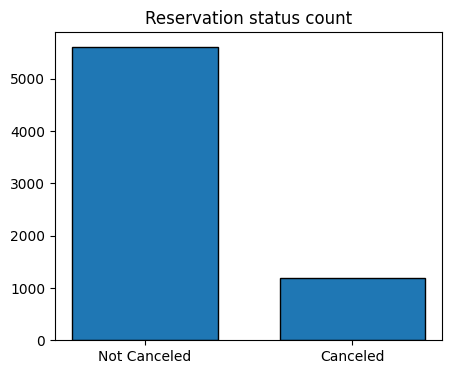

In [44]:
cancelled_perc=df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

plt.figure(figsize=(5,4))
plt.title('Reservation status count')
plt.bar(['Not Canceled','Canceled'],df['is_canceled'].value_counts(), edgecolor='k', width=0.7)
plt.show()

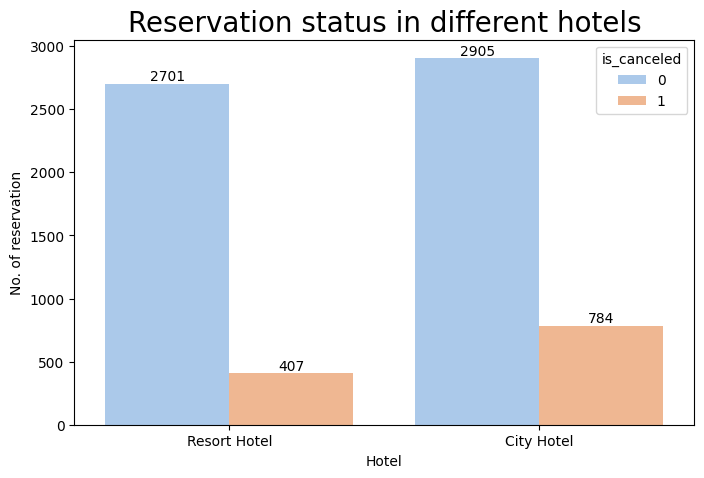

In [53]:
plt.figure(figsize=(8,5))
ax1=sns.countplot(x='hotel',hue='is_canceled',data=df,palette='pastel')
for bars in ax1.containers:
    ax1.bar_label(bars)
plt.title('Reservation status in different hotels',size=20)
plt.xlabel('Hotel')
plt.ylabel('No. of reservation')
plt.show()

In [54]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.869048
1    0.130952
Name: proportion, dtype: float64

In [55]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.787476
1    0.212524
Name: proportion, dtype: float64

In [67]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

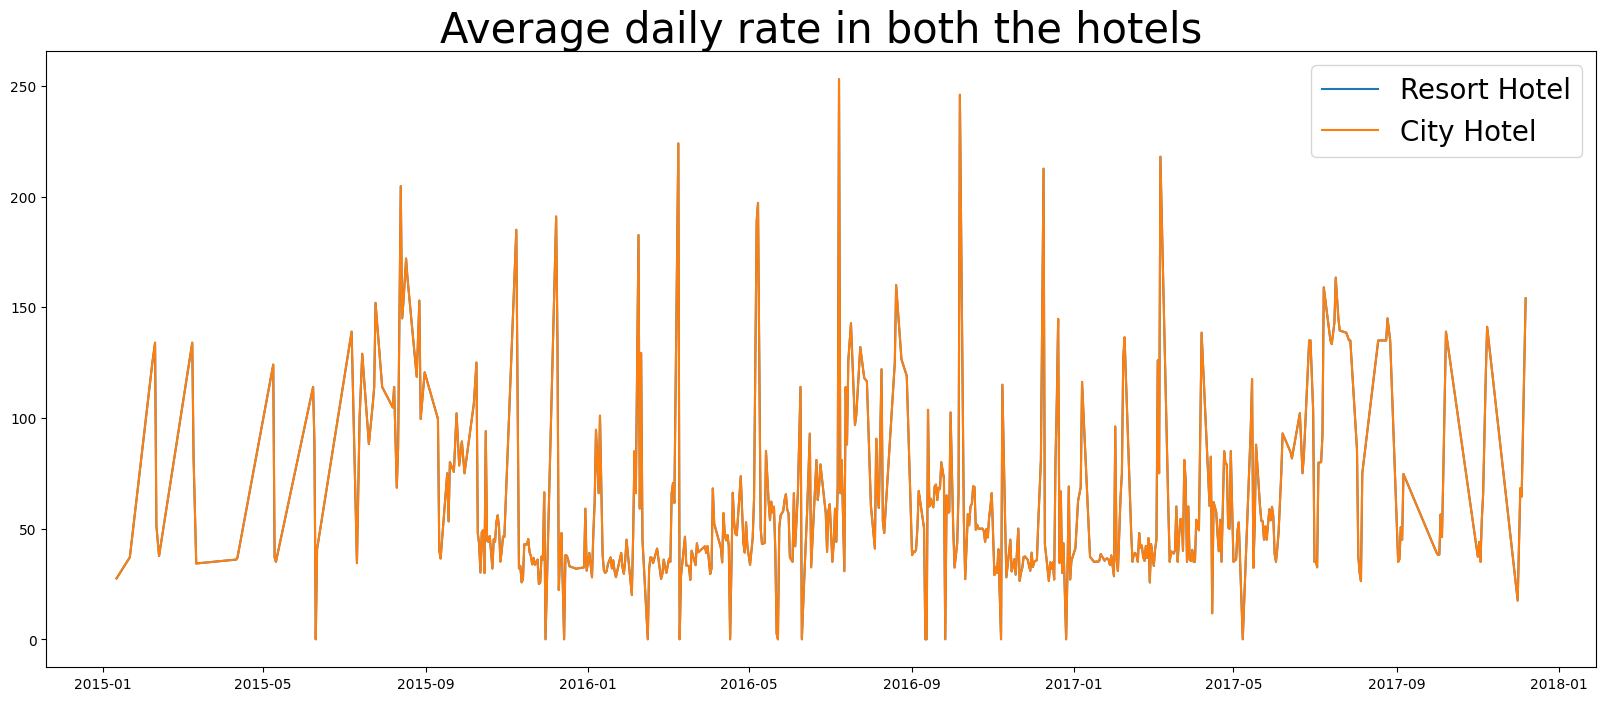

In [68]:
plt.figure(figsize=(20,8))
plt.title('Average daily rate in both the hotels',fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='City Hotel')
plt.legend(fontsize=20)
plt.show()

In [62]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
print(resort_hotel)

                             adr
reservation_status_date         
2015-01-11                27.500
2015-01-21                37.050
2015-02-07               125.140
2015-02-09               134.000
2015-02-10                51.290
...                          ...
2017-11-08               141.165
2017-12-01                17.500
2017-12-03                68.250
2017-12-04                64.500
2017-12-07               154.000

[529 rows x 1 columns]


In [69]:
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()
print(city_hotel)

                             adr
reservation_status_date         
2015-01-11                27.500
2015-01-21                37.050
2015-02-07               125.140
2015-02-09               134.000
2015-02-10                51.290
...                          ...
2017-11-08               141.165
2017-12-01                17.500
2017-12-03                68.250
2017-12-04                64.500
2017-12-07               154.000

[529 rows x 1 columns]


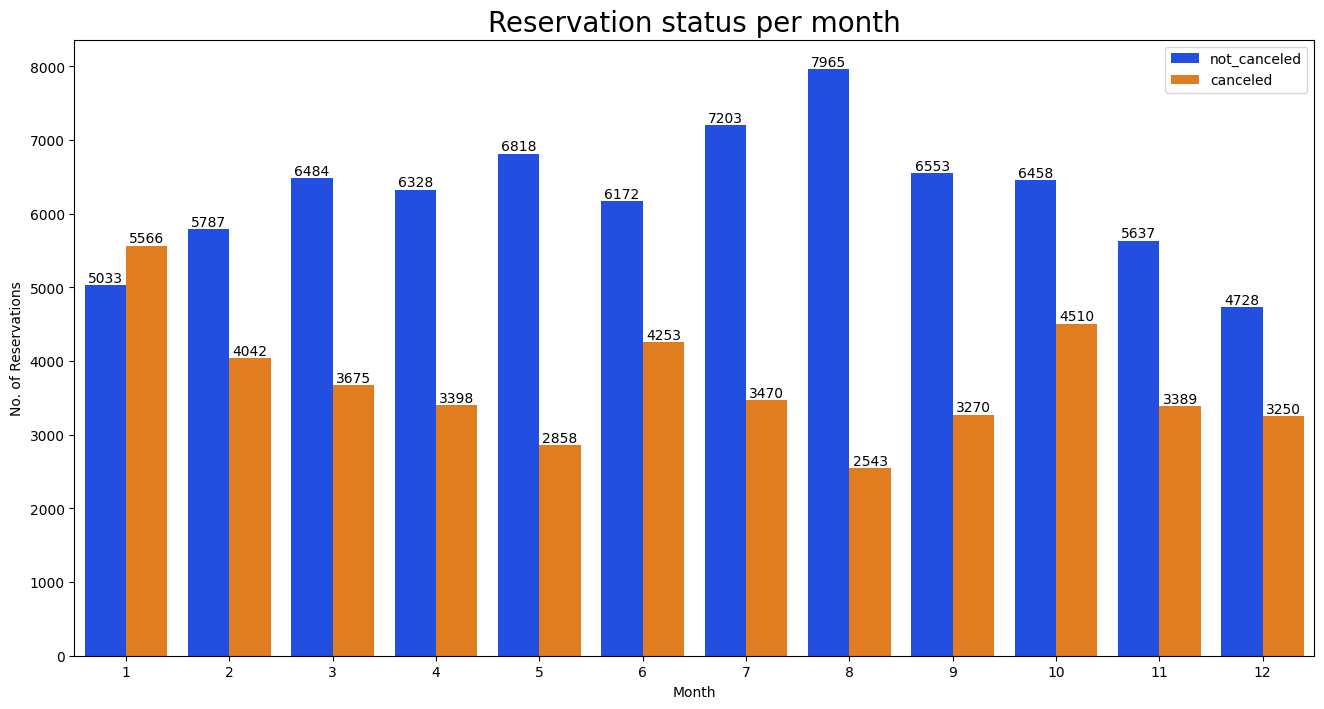

In [77]:
date_col=pd.DatetimeIndex(df['reservation_status_date'])
df['month']=date_col.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month',hue='is_canceled',data=df,palette='bright')
for bars in ax1.containers:
    ax1.bar_label(bars)
plt.title('Reservation status per month',size=20)
plt.xlabel('Month')
plt.ylabel('No. of Reservations')
plt.legend(['not_canceled','canceled'])
plt.show()

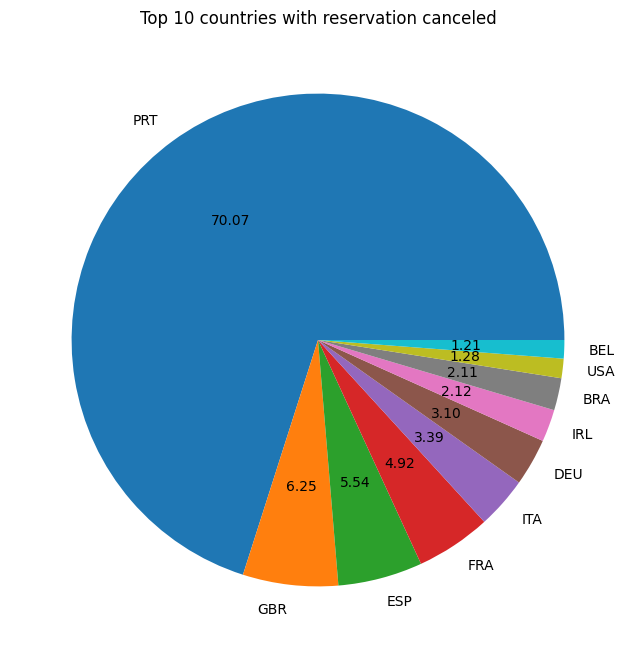

In [89]:
cancelled_data=df[df['is_canceled']==1]
top_10_country=cancelled_data['country'].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country,autopct='%.2f',labels=top_10_country.index)
plt.show()

In [91]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: proportion, dtype: float64

In [92]:
cancelled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.468954
Groups           0.273539
Offline TA/TO    0.187930
Direct           0.043732
Corporate        0.022431
Complementary    0.002193
Aviation         0.001176
Undefined        0.000045
Name: proportion, dtype: float64